In [2]:
import pydicom as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import csv
import nibabel as nib
import os
from os.path import isfile, join
from skimage import io
import itk
from itkwidgets import view
# import ipympl
%matplotlib inline

In [65]:
def intensity_mean(original):
    original = original.flatten()
    new_ori = np.delete(original, np.where(original == 0))
    return np.mean(new_ori)


def intensity_std(original):
    original = original.flatten()
    new_ori = np.delete(original, np.where(original == 0))
    return np.std(new_ori)


def intensity_norm(original, mean, std):
    normalized = (original - mean)/std
    normalized[normalized > 5] = 5
    # normalized[normalized < -5] = -5
    # normalized = (normalized + 5)/(2*5)
    normalized = (normalized - normalized.min()) / (normalized.max() - normalized.min())
    return normalized

In [66]:
input_dir = '/home/sci/hdai/Projects/Dataset/LymphNodes'

In [67]:
case_info = []
field_list = ['Series UID', 'Collection', '3rd Party Analysis', 'Data Description URI', 'Subject ID', 'Study UID', 'Study Description', 'Study Date', 'Series Description', 'Manufacturer', 'Modality', 'SOP Class Name', 'SOP Class UID', 'Number of Images', 'File Size', 'File Location', 'Download Timestamp']
with open(f'{input_dir}/metadata.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for row in reader:
        case_info.append({field_list[i]:row[i] for i in range(len(row))})
# case_info.pop(0)

In [68]:
case_info=case_info[87:]

In [12]:
for idx in range(len(case_info)):
    relative_ct_folder_path = case_info[idx]['File Location'][1:].replace('\\','/')
    # '/home/sci/hdai/Projects/LymphNodes/CT Lymph Nodes/ABD_LYMPH_003/09-14-2014-ABDLYMPH003-abdominallymphnodes-39052/abdominallymphnodes-65663'
    ct_folder_path = f'{input_dir}{relative_ct_folder_path}'
    slice_name_list = [f for f in os.listdir(ct_folder_path)]
    slice_name_list.sort()
    print(len(slice_name_list))

#     slice_list = []
#     for slice_name in slice_name_list:
#         ds = pd.dcmread(f'{ct_folder_path}/{slice_name}')
#         slice_list.append(torch.from_numpy(ds.pixel_array.transpose()))
#     img = torch.stack(slice_list,-1)
#     print(img.shape)

666
661
756
706
627
676
676
671
675
655
619
517
631
621
701
493
529
681
721
708
626
677
636
741
691
553
696
718
642
650
541
621
696
651
457
636
679
457
609
661
591
524
461
631
717
709
521
493
553
509
517
521
454
581
716
682
666
646
681
691
735
748
549
533
598
666
545
702
626
711
686
501
429
635
667
656
657
641
641
636
718
591
489
657
718
776
661
623


In [6]:
idx=59

In [7]:
# '/CT Lymph Nodes/ABD_LYMPH_003/09-14-2014-ABDLYMPH003-abdominallymphnodes-39052/abdominallymphnodes-65663'
relative_ct_folder_path = case_info[idx]['File Location'][1:].replace('\\','/')
# '/home/sci/hdai/Projects/LymphNodes/CT Lymph Nodes/ABD_LYMPH_003/09-14-2014-ABDLYMPH003-abdominallymphnodes-39052/abdominallymphnodes-65663'
ct_folder_path = f'{input_dir}{relative_ct_folder_path}'
slice_name_list = [f for f in os.listdir(ct_folder_path)]
slice_name_list.sort()

slice_list = []
for slice_name in slice_name_list:
    ds = pd.dcmread(f'{ct_folder_path}/{slice_name}')
    slice_list.append(torch.from_numpy(ds.pixel_array.transpose()))
img = torch.stack(slice_list,-1)

case_name = case_info[idx]['File Location'][17:30].replace('\\','/')
mask_path = f'/home/sci/hdai/Projects/LymphNodes/MED_ABD_LYMPH_MASKS/{case_name}/{case_name}_mask.nii.gz'
mask = nib.load(mask_path).get_fdata()

In [8]:
case_info[idx]['File Location'][17:30]

'ABD_LYMPH_060'

Text(0.5, 1.0, 'transversal')

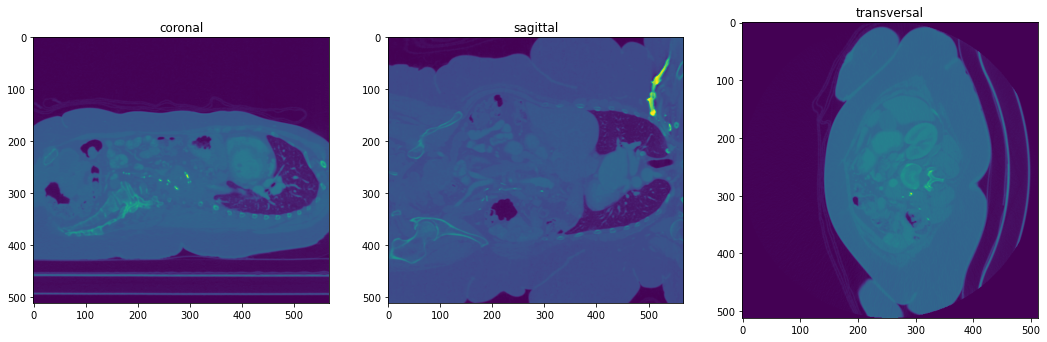

In [10]:
c,s,t = 297,266,276
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(18, 6))
ax1.imshow(img[c,:,:].numpy())
ax1.set_title('coronal')
ax2.imshow(img[:,s,:].numpy())
ax2.set_title('sagittal')
ax3.imshow(img[:,:,t].numpy())
ax3.set_title('transversal')

In [31]:
img[272,177,188]

tensor(60, dtype=torch.int16)

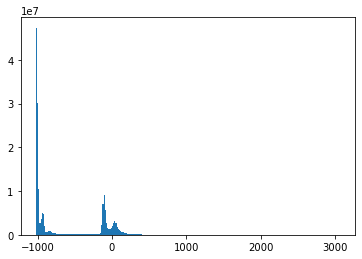

In [29]:
ax = plt.hist(img.numpy().ravel(), bins = 256)
plt.show()

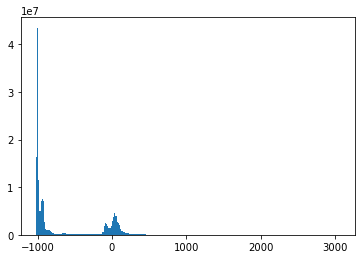

In [24]:
ax = plt.hist(img.numpy().ravel(), bins = 256)
plt.show()

Text(0.5, 1.0, 'transversal')

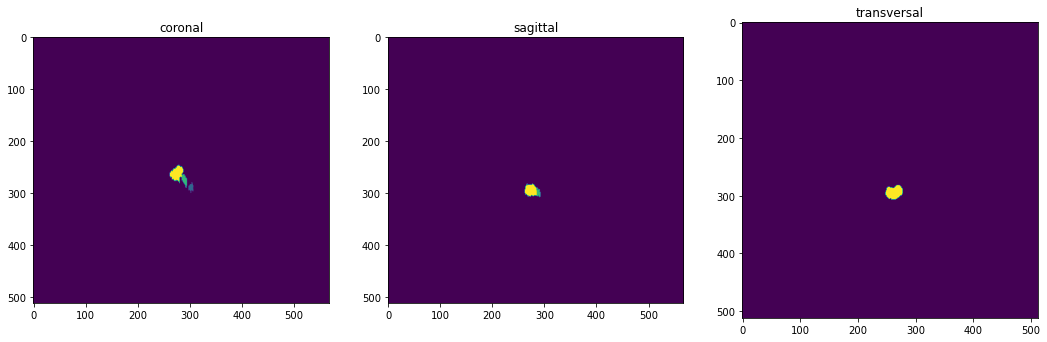

In [9]:
c,s,t = 297,266,276
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(18, 6))
ax1.imshow(mask[c,:,:])
ax1.set_title('coronal')
ax2.imshow(mask[:,s,:])
ax2.set_title('sagittal')
ax3.imshow(mask[:,:,t])
ax3.set_title('transversal')

(512, 512, 650)

In [17]:
encoded_true = torch.zeros((2,512,512,706))
encoded_true[0][mask==1] = 1
encoded_true[1][mask==0] = 1

In [20]:
torch.min(encoded_true[0]+encoded_true[1])

tensor(1.)

In [38]:
encoded_target = torch.zeros((4, 512, 512, 650),dtype=torch.int64)
# unsqueeze(1) 在位置1上增加一个维度
encoded_target.scatter_(1, torch.from_numpy(mask).unsqueeze(1), 1)

IndexError: scatter_(): Expected dtype int64 for index.

In [39]:
encoded_target

tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         ...,

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 

In [171]:
c_coord,s_coord=torch.where(torch.from_numpy(mask[:,:,370])!=0)#,t_coord

In [174]:
torch.mean(c_coord.float())

tensor(285.9295)

In [144]:
[print(i) for i in s_coord]

178
179
180
181
182
183
184
185
186
187
171
172
173
174
175
177
178
179
180
181
182
183
184
185
186
187
188
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
167
168
169
170
171
172
173
174


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

Text(0.5, 1.0, 'transversal')

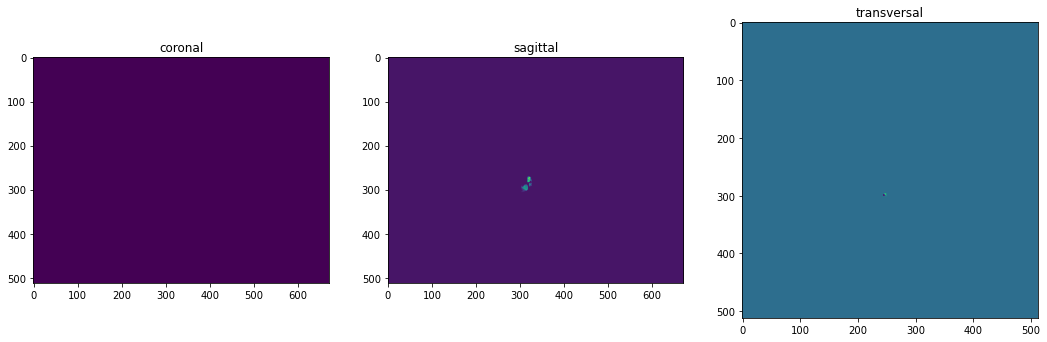

In [17]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(18, 6))
ax1.imshow(img[c,:,:].numpy()*mask[c,:,:])
ax1.set_title('coronal')
ax2.imshow(img[:,s,:].numpy()*mask[:,s,:])
ax2.set_title('sagittal')
ax3.imshow(img[:,:,t].numpy()*mask[:,:,t])
ax3.set_title('transversal')

## Visualizing mask in dataloader

In [83]:
idx = 60
patch_size = 128

In [84]:
        relative_ct_folder_path = case_info[idx]['File Location'][1:].replace('\\','/')
        print(relative_ct_folder_path)
        # '/home/sci/hdai/Projects/LymphNodes/CT Lymph Nodes/ABD_LYMPH_003/09-14-2014-ABDLYMPH003-abdominallymphnodes-39052/abdominallymphnodes-65663'
        ct_folder_path = f'{input_dir}{relative_ct_folder_path}'
        slice_name_list = [f for f in os.listdir(ct_folder_path)]
        slice_name_list.sort()
        slice_list = []
        for slice_name in slice_name_list:
            ds = pd.dcmread(f'{ct_folder_path}/{slice_name}')
            slice_list.append(torch.from_numpy(ds.pixel_array.transpose()))
        img = torch.stack(slice_list,-1)
        
#         load 3d mask
        case_name = case_info[idx]['File Location'][17:30].replace('\\','/')
        mask_path = f'{input_dir}/MED_ABD_LYMPH_MASKS/{case_name}/{case_name}_mask.nii.gz'
        mask = torch.from_numpy(nib.load(mask_path).get_fdata())
        mask[mask>1] = 1
        
        half_patch_size = int(patch_size/2)
        idx_x, idx_y, idx_z = torch.where(mask!=0)
        centroid_x, centroid_y, centroid_z = 256, 256, 300
        if int(torch.mean(idx_x.float())) < mask.shape[0]-half_patch_size and int(torch.mean(idx_x.float())) > half_patch_size:
            print('accurate x')
            centroid_x = int(torch.mean(idx_x.float()))
        if int(torch.mean(idx_y.float())) < mask.shape[1]-half_patch_size and int(torch.mean(idx_y.float())) > half_patch_size:
            print('accurate y')
            centroid_y = int(torch.mean(idx_y.float()))
        if int(torch.mean(idx_z.float())) < mask.shape[2]-half_patch_size and int(torch.mean(idx_z.float())) > half_patch_size:
            print('accurate z')
            centroid_z = int(torch.mean(idx_z.float()))
        
        image_list, mask_list = [], []
        
        mask_cropped = mask[centroid_x-half_patch_size:centroid_x+half_patch_size, \
                    centroid_y-half_patch_size:centroid_y+half_patch_size, \
                    centroid_z-half_patch_size:centroid_z+half_patch_size]
        
        
        img_cropped = img[centroid_x-half_patch_size:centroid_x+half_patch_size, \
                    centroid_y-half_patch_size:centroid_y+half_patch_size, \
                    centroid_z-half_patch_size:centroid_z+half_patch_size]
        img_cropped[img_cropped<70-750]=70-750
        img_cropped[img_cropped>70+750]=70+750
        img_cropped = img_cropped - torch.min(img_cropped)
        img_cropped = img_cropped/(torch.max(img_cropped)-torch.min(img_cropped))

/CT Lymph Nodes/MED_LYMPH_062/09-14-2014-MEDLYMPH062-mediastinallymphnodes-32415/mediastinallymphnodes-38215
accurate x
accurate y
accurate z


In [85]:
view(img_cropped)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageF3; pro…

In [86]:
view(mask_cropped)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [77]:
view(mask_cropped*img_cropped)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

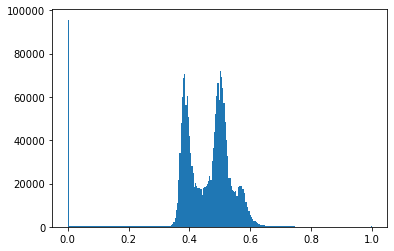

In [87]:
ax = plt.hist(img_cropped.numpy().ravel(), bins = 256)
plt.show()

In [3]:
f=pd.dcmread("/home/sci/hdai/Projects/Dataset/LymphNodes/CT Lymph Nodes/MED_LYMPH_090/09-14-2014-MEDLYMPH090-mediastinallymphnodes-70301/mediastinallymphnodes-95608/1-623.dcm")

In [4]:
f

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 61.7.109864097008623132262185042582270785256
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 61.7.109864097008623132262185042582270785256
(0008, 0020) Study Date                          DA: '20140914'
(0008, 0030) Study Time                          TM: ''
(0008, 0050) Accession N